<a href="https://colab.research.google.com/github/KLeeDE/Python/blob/master/4_Python_Week4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial

https://github.com/jsimkins2/geog473-673/blob/master/Python/Pandas_tutorial.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
type(orders)

pandas.core.frame.DataFrame

In [5]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
orders['item_name'][0:5]

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

In [8]:
orders.item_name[0:5]

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

Bracket notation will always work, whereas dot notation has limitations:
* Dot notation doesn't work if there are spaces in the Series name
* Dot notation doesn't work if the Series has the same name as a DataFrame method or attribute (like 'head' or 'shape')
* Dot notation can't be used to define the name of a new Series (see below)

In [9]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('http://bit.ly/uforeports')
# examine the column names
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [10]:
# rename two of the columns by using the 'rename' method
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [11]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [12]:
# replace the column names during the file reading process by using the 'names' parameter
ufo = pd.read_csv('http://bit.ly/uforeports', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [13]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [14]:
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [15]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.city + ', ' + ufo.state
ufo.head()

,city,colors_reported,shape_reported,state,time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [16]:
ufo.describe() #Describe is a quick function to tell us about the data frame

,city,colors_reported,shape_reported,state,time,Location
count,18216,2882,15597,18241,18241,18216
unique,6476,27,27,52,16145,8029
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00,"Seattle, WA"
freq,187,780,2803,2529,27,187


In [17]:
# remove a single column (axis=1 refers to columns)
ufo.drop('colors_reported', axis=1, inplace=True)
ufo.head()

,city,shape_reported,state,time,Location
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


#Pandas Assignment - October 2015 Wind Plot

* Subset dataset to October 2015 only
* Convert Wind Speed & Wind Gust data from m/s to mph
* Plot wind speed and wind gust on same plot - wind speed as lines and wind gust as points
* Add legend
* Compute correlation coefficient between wind gust and wind speed using pandas.dataframe.corr() - add to title of plot

#Subset dataset to October 2015 only

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [24]:
deos_data = pd.read_csv('/content/drive/MyDrive/GEOG673/DEOS.csv')
deos_data

,Timestamp (UTC),Air Temperature(deg. C),Dew Point Temperature(deg. C),Wind Speed(m/sec),Wind Direction(deg.),Barometric Pressure(),Solar Radiation(UNKNOWN),Wind Gust Speed (5)(m/sec),Gage Precipitation (5)(mm)
0,2014-04-04 04:05,7.1,4.3,3.7,351.7,,0,5.1,0.00
1,2014-04-04 04:10,6.9,4.3,3.5,352.9,,0,5.8,0.00
2,2014-04-04 04:15,6.8,4.3,3.9,357.5,,0,6.2,0.25
3,2014-04-04 04:20,6.7,4.4,3.9,356.8,,0,5.9,0.00
4,2014-04-04 04:25,6.6,4.4,3.3,5.5,,0,4.9,0.00
...,...,...,...,...,...,...,...,...,...
182640,2015-12-31 23:40,9.2,5.7,3.4,350.3,,0,5.5,0.00
182641,2015-12-31 23:45,9.2,5.6,3.6,352.5,,0,5.2,0.00
182642,2015-12-31 23:50,9.2,5.5,3.6,347.5,,0,5.6,0.00
182643,2015-12-31 23:55,9.1,5.3,3.2,351.1,,0,5.0,0.00


In [25]:
# replace all of the column names by overwriting the 'columns' attribute
deos_cols = ['Timestamp', 'AirTemperature', 'DewPoint','WindSpeed','WindDirection','BarometricPressure', 'SolarRadiation', 'WindGust', 'GagePrecipitation']
deos_data.columns = deos_cols
deos_data

,Timestamp,AirTemperature,DewPoint,WindSpeed,WindDirection,BarometricPressure,SolarRadiation,WindGust,GagePrecipitation
0,2014-04-04 04:05,7.1,4.3,3.7,351.7,,0,5.1,0.00
1,2014-04-04 04:10,6.9,4.3,3.5,352.9,,0,5.8,0.00
2,2014-04-04 04:15,6.8,4.3,3.9,357.5,,0,6.2,0.25
3,2014-04-04 04:20,6.7,4.4,3.9,356.8,,0,5.9,0.00
4,2014-04-04 04:25,6.6,4.4,3.3,5.5,,0,4.9,0.00
...,...,...,...,...,...,...,...,...,...
182640,2015-12-31 23:40,9.2,5.7,3.4,350.3,,0,5.5,0.00
182641,2015-12-31 23:45,9.2,5.6,3.6,352.5,,0,5.2,0.00
182642,2015-12-31 23:50,9.2,5.5,3.6,347.5,,0,5.6,0.00
182643,2015-12-31 23:55,9.1,5.3,3.2,351.1,,0,5.0,0.00


In [26]:
#Set the index of the Pandas DataFrame to Date
deos_data.set_index('Timestamp', inplace=True)
deos_data.head()

,AirTemperature,DewPoint,WindSpeed,WindDirection,BarometricPressure,SolarRadiation,WindGust,GagePrecipitation
Timestamp,,,,,,,,
2014-04-04 04:05,7.1,4.3,3.7,351.7,,0,5.1,0.00
2014-04-04 04:10,6.9,4.3,3.5,352.9,,0,5.8,0.00
2014-04-04 04:15,6.8,4.3,3.9,357.5,,0,6.2,0.25
2014-04-04 04:20,6.7,4.4,3.9,356.8,,0,5.9,0.00
2014-04-04 04:25,6.6,4.4,3.3,5.5,,0,4.9,0.00


In [27]:
deos_data.describe()

,AirTemperature,DewPoint,WindSpeed,WindDirection,SolarRadiation,WindGust,GagePrecipitation
count,182645.000000,182645.000000,182645.00000,182645.000000,182645.000000,182645.000000,182645.000000
mean,14.102732,8.505265,2.99669,186.968699,192.732744,4.906990,0.013539
std,9.040767,9.408601,1.82756,103.266186,293.014540,2.712489,0.152888
min,-51.000000,-53.300000,0.10000,0.000000,0.000000,0.100000,0.000000
25%,7.600000,2.200000,1.80000,99.300000,0.000000,2.900000,0.000000
50%,15.200000,10.200000,2.60000,202.200000,4.000000,4.400000,0.000000
75%,21.200000,16.200000,3.70000,258.900000,313.000000,6.400000,0.000000
max,37.000000,25.500000,16.70000,360.000000,1335.000000,24.400000,9.650000


In [28]:
deos_data.loc['2015-10-01 00:05']

AirTemperature         17.4
DewPoint               16.7
WindSpeed               4.4
WindDirection         348.3
BarometricPressure         
SolarRadiation            0
WindGust                7.9
GagePrecipitation         0
Name: 2015-10-01 00:05, dtype: object

In [34]:
deos_data["AirTemperature"].nlargest(5)

Timestamp
2014-06-18 18:15    37.0
2014-06-18 18:40    36.7
2014-06-18 18:20    36.5
2014-06-18 19:30    36.5
2014-06-18 18:05    36.4
Name: AirTemperature, dtype: float64

In [35]:
deos_data["AirTemperature"].nsmallest(5)

Timestamp
2015-04-07 16:10   -51.0
2015-04-07 16:15   -43.9
2015-02-21 03:50   -16.7
2015-02-21 03:55   -16.7
2015-02-20 11:35   -16.6
Name: AirTemperature, dtype: float64

In [38]:
#temp_series = deos_data["AirTemperature"]
temp_series = deos_data['2015-10-01' : '2015-10-31']
temp_series

,AirTemperature,DewPoint,WindSpeed,WindDirection,BarometricPressure,SolarRadiation,WindGust,GagePrecipitation
Timestamp,,,,,,,,
2015-10-01 00:00,17.3,16.6,5.1,349.7,,0,8.1,0.0
2015-10-01 00:05,17.4,16.7,4.4,348.3,,0,7.9,0.0
2015-10-01 00:10,17.4,16.7,5.0,349.8,,0,7.9,0.0
2015-10-01 00:15,17.5,16.8,5.4,352.7,,0,8.1,0.0
2015-10-01 00:20,17.5,16.9,5.4,355.7,,0,8.1,0.0
...,...,...,...,...,...,...,...,...
2015-10-30 23:35,12.2,3.9,2.6,337.2,,0,5.2,0.0
2015-10-30 23:40,12.2,3.7,1.9,326.2,,0,6.3,0.0
2015-10-30 23:45,12.1,3.7,2.3,344.9,,0,6.1,0.0


#Convert Wind Speed & Wind Gust data from m/s to mph

In [39]:
# 1 m/s (meter per second) = 2.237 mph (miles per hour)
temp_series["WindSpeed(mph)"] = temp_series["WindSpeed"] * 2.237
temp_series["WindGust(mph)"] = temp_series["WindGust"] * 2.237
temp_series.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AirTemperature,DewPoint,WindSpeed,WindDirection,BarometricPressure,SolarRadiation,WindGust,GagePrecipitation,WindSpeed(mph),WindGust(mph)
Timestamp,,,,,,,,,,
2015-10-01 00:00,17.3,16.6,5.1,349.7,,0,8.1,0.0,11.4087,18.1197
2015-10-01 00:05,17.4,16.7,4.4,348.3,,0,7.9,0.0,9.8428,17.6723
2015-10-01 00:10,17.4,16.7,5.0,349.8,,0,7.9,0.0,11.1850,17.6723
2015-10-01 00:15,17.5,16.8,5.4,352.7,,0,8.1,0.0,12.0798,18.1197
2015-10-01 00:20,17.5,16.9,5.4,355.7,,0,8.1,0.0,12.0798,18.1197


#Plot wind speed and wind gust on same plot - wind speed as lines and wind gust as points

#Add legend

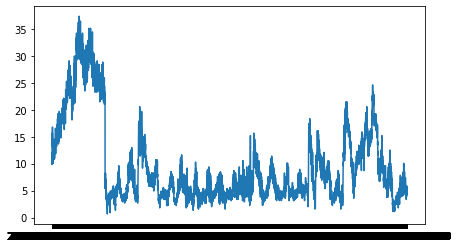

In [46]:
plt.figure(figsize=[7,4])
plt.plot(temp_series["WindSpeed(mph)"])

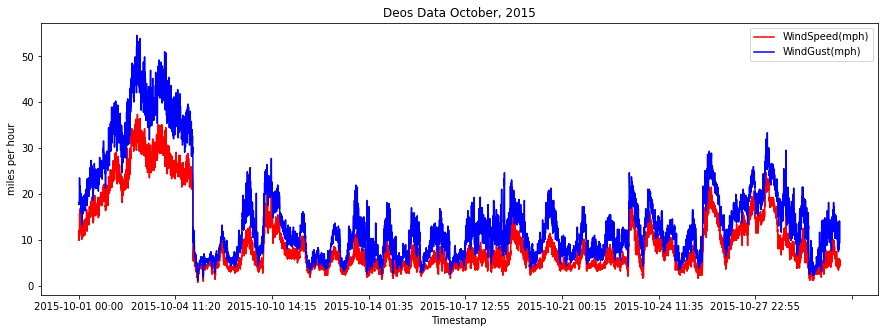

In [89]:
plt.close()

plt.figure()
temp_series["WindSpeed(mph)"]["2015-10-01" : "2015-10-31"].plot(color='red', figsize=[15,5])
temp_series["WindGust(mph)"]["2015-10-01" : "2015-10-31"].plot(color='blue') #, style = '.')
plt.xlabel('Timestamp')
plt.ylabel('miles per hour')
plt.title('Deos Data October, 2015')
plt.legend()

#Compute correlation coefficient between wind gust and wind speed using pandas.dataframe.corr() - add to title of plot

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

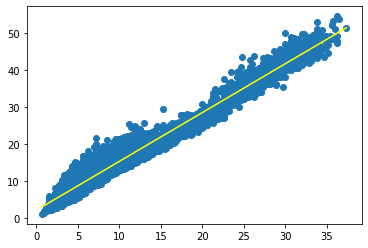

In [71]:
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')

In [72]:
x = temp_series["WindSpeed(mph)"]
y = temp_series["WindGust(mph)"]
print(np.corrcoef(x, y))

[[1.         0.98237619]
 [0.98237619 1.        ]]


In [66]:
temp_series.corr()

,AirTemperature,DewPoint,WindSpeed,WindDirection,SolarRadiation,WindGust,GagePrecipitation,WindSpeed(mph),WindGust(mph)
AirTemperature,1.000000,0.459385,-0.044804,-0.002184,0.517734,-0.004257,-0.082454,-0.044804,-0.004257
DewPoint,0.459385,1.000000,0.293849,-0.246484,-0.208392,0.279506,0.098115,0.293849,0.279506
WindSpeed,-0.044804,0.293849,1.000000,-0.627331,-0.105351,0.982376,0.243599,1.000000,0.982376
WindDirection,-0.002184,-0.246484,-0.627331,1.000000,0.074747,-0.553070,-0.141756,-0.627331,-0.553070
SolarRadiation,0.517734,-0.208392,-0.105351,0.074747,1.000000,-0.066350,-0.094563,-0.105351,-0.066350
WindGust,-0.004257,0.279506,0.982376,-0.553070,-0.066350,1.000000,0.243111,0.982376,1.000000
GagePrecipitation,-0.082454,0.098115,0.243599,-0.141756,-0.094563,0.243111,1.000000,0.243599,0.243111
WindSpeed(mph),-0.044804,0.293849,1.000000,-0.627331,-0.105351,0.982376,0.243599,1.000000,0.982376
WindGust(mph),-0.004257,0.279506,0.982376,-0.553070,-0.066350,1.000000,0.243111,0.982376,1.000000


In [69]:
df = temp_series[["WindSpeed(mph)", "WindGust(mph)"]]
df.corr()

,WindSpeed(mph),WindGust(mph)
WindSpeed(mph),1.000000,0.982376
WindGust(mph),0.982376,1.000000


In [68]:
df.corr(method='pearson')

,WindSpeed(mph),WindGust(mph)
WindSpeed(mph),1.000000,0.982376
WindGust(mph),0.982376,1.000000


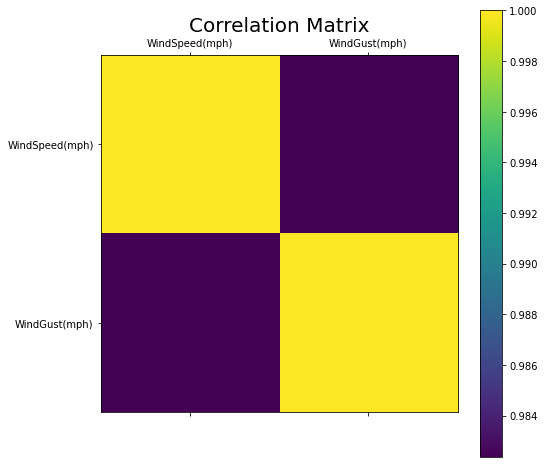

In [85]:
fig = plt.figure(figsize=(8,8))
plt.matshow(df.corr(), fignum=fig.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10) #, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix", fontsize=20)
plt.show()